In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Jayendran
[nltk_data]     Kannaiyan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("mercari_train.csv", index_col = ["id"])
df.head(1)

,name,item_condition_id,category_name,brand_name,price,shipping,seller_id,item_description
id,,,,,,,,
17,"Hold Alyssa Frye Harness boots 12R, Sz 7",3,Women/Shoes/Boots,Frye,79,1,211140753,Good used condition Women's Fyre harness boots...


In [3]:
df_test = pd.read_csv("mercari_test.csv", index_col = ["id"])
df_test.head()

,name,item_condition_id,category_name,brand_name,shipping,seller_id,item_description
id,,,,,,,
46,Corral boots,2,Women/Shoes/Boots,NaN,0,2261402465,Corral boots in excellent condition barely used
88,Vince Camuto Riding boots size 6,2,Women/Shoes/Boots,Vince Camuto,0,2021876312,super cute brown or cognac knee high riding bo...
212,Brand new UGG boots,1,Women/Shoes/Boots,UGG Australia,0,5803720303,New in box
289,"LL Bean Boots 8"" Red sz 7M",3,Women/Shoes/Boots,L.L. Bean,0,1065939786,Made to withstand winter climate.
299,Black UGGS cargo boot,3,Women/Shoes/Boots,UGG Australia,1,479394728,"Unique, super cute and warm! EUC. Only selling..."


In [4]:
print(df.shape)
print(df_test.shape)

(68400, 8)
(31789, 7)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68400 entries, 17 to 279814
Data columns (total 8 columns):
name                 68400 non-null object
item_condition_id    68400 non-null int64
category_name        68400 non-null object
brand_name           46935 non-null object
price                68400 non-null int64
shipping             68400 non-null int64
seller_id            68400 non-null int64
item_description     61590 non-null object
dtypes: int64(4), object(4)
memory usage: 4.7+ MB


# 1. Price

In [6]:
df.price.describe()

count    68400.000000
mean        22.881915
std         28.613151
min          3.000000
25%          9.000000
50%         15.000000
75%         28.000000
max       1375.000000
Name: price, dtype: float64

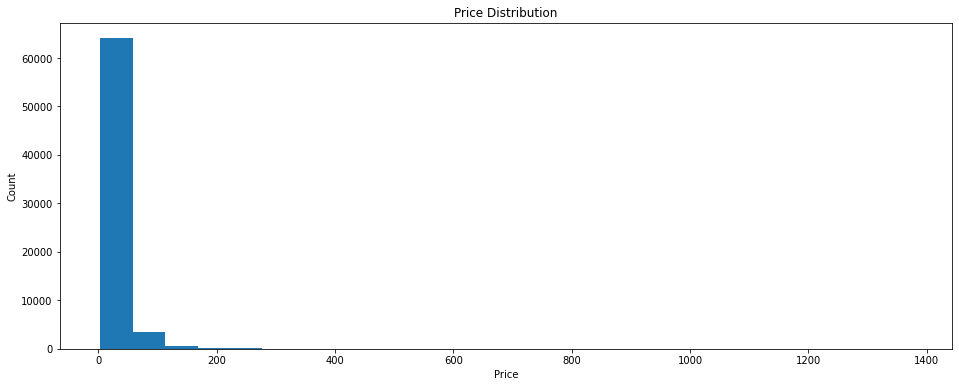

In [7]:
plt.figure(figsize=(16,6))
plt.hist(df.price,bins=25)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

In [8]:
df["log_price"] = df.price.apply(lambda x:np.log(x+1))
df.head()

,name,item_condition_id,category_name,brand_name,price,shipping,seller_id,item_description,log_price
id,,,,,,,,,
17,"Hold Alyssa Frye Harness boots 12R, Sz 7",3,Women/Shoes/Boots,Frye,79,1,211140753,Good used condition Women's Fyre harness boots...,4.382027
19,Steve Madden booties,3,Women/Shoes/Boots,Steve Madden,31,0,3874531266,"The brand is actually ""Steven"" by Steve Madden...",3.465736
42,BCBG Tan Booties,1,Women/Shoes/Boots,NaN,48,0,8341537216,Brand new! Does not include the box.,3.891820
45,NWT Sorel Caribou boots size 8.5,1,Women/Shoes/Boots,NaN,85,0,4040379892,New in box. Size 8.5,4.454347
58,NIB Hunter Tiffany Mint Boots Size 5,1,Women/Shoes/Boots,Hunter,200,0,19216599,Brand new never worn only flaw is as you can s...,5.303305


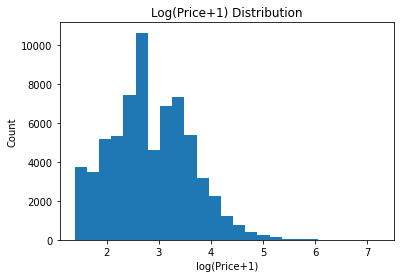

In [9]:
plt.hist(df.log_price,bins=25)
plt.title("Log(Price+1) Distribution")
plt.xlabel("log(Price+1)")
plt.ylabel("Count")
plt.show()

# 2. Item_condition_id

+----------+-------+------------+
| Category | Count | Percent(%) |
+----------+-------+------------+
|    2     | 24250 |    35.5    |
|    3     | 24040 |    35.1    |
|    1     | 18434 |    27.0    |
|    4     |  1629 |    2.4     |
|    5     |   47  |    0.1     |
+----------+-------+------------+


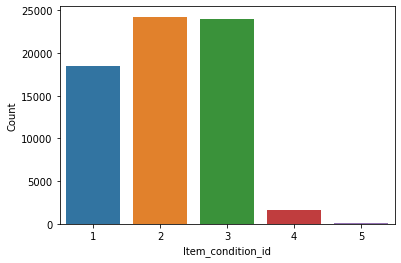

In [10]:
# TABULATING THE CATEGORIES IN "item_condition_id", COUNT AND PERCENTAGE

x = PrettyTable()
x.add_column("Category",df.item_condition_id.value_counts().index)
x.add_column("Count",df.item_condition_id.value_counts().values)
x.add_column("Percent(%)",np.round(df.item_condition_id.value_counts().values/df.shape[0]*100,1))
print(x)

# BAR PLOT TO SHOW THE COUNT PRESESNT WITH EACH CATEGORY

sns.barplot(x =df.item_condition_id.value_counts().index,y= df.item_condition_id.value_counts().values)
plt.xlabel("Item_condition_id")
plt.ylabel("Count")
plt.show()

# 3. Shipping

+----------+-------+------------+
| Category | Count | Percent(%) |
+----------+-------+------------+
|    0     | 42748 |    62.5    |
|    1     | 25652 |    37.5    |
+----------+-------+------------+


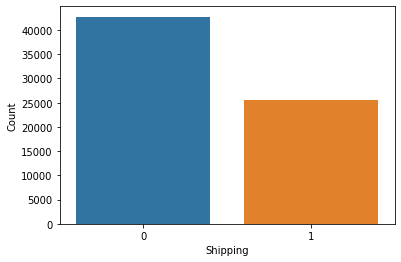

In [11]:
# TABULATING THE CATEGORIES IN "shipping", COUNT AND PERCENTAGE 

x = PrettyTable()
x.add_column("Category",df.shipping.value_counts().index)
x.add_column("Count",df.shipping.value_counts().values)
x.add_column("Percent(%)",np.round(df.shipping.value_counts().values/df.shape[0]*100,2))
print(x)

# BAR PLOT TO SHOW THE COUNT PRESESNT WITH EACH CATEGORY

sns.barplot(x =df.shipping.value_counts().index,y= df.shipping.value_counts().values)
plt.xlabel("Shipping")
plt.ylabel("Count")
plt.show()

# 4. Name

In [12]:
def decontracted(phrase):
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

st_words = stopwords.words('english')

# Function to preprocess the name

def name_process(text):             
    text = decontracted(text)
    text = re.sub("[^A-Za-z0-9 ]","",text)  
    text = text.lower()
    text =  " ".join([i for i in text.split() if i not in st_words])
    if len(text)==0:
        text = "missing"
    return text

In [13]:
# Applying "preprocessing" function on the feature "name"

df["name_processed"] = df.name.apply(name_process)
df[df.name_processed.isnull()].name_processed ="missing" 

# Applying "preprocessing" function on the feature "name" on test data

df_test["name_processed"] = df_test.name.apply(name_process)
df_test[df_test.name_processed.isnull()].name_processed ="missing" 

Total number of categories = 54016
Top 20
+-----------------------+-------+------------+
|         Names         | Count | Percent(%) |
+-----------------------+-------+------------+
|         bundle        |  188  |    0.27    |
|  lularoe tc leggings  |  172  |    0.25    |
|  lularoe os leggings  |  134  |    0.2     |
|  victoria secret bra  |  121  |    0.18    |
|  michael kors wallet  |  118  |    0.17    |
|      coach wallet     |  103  |    0.15    |
|      lularoe irma     |   99  |    0.14    |
|      coach purse      |   88  |    0.13    |
|      nike shorts      |   85  |    0.12    |
|  american eagle jeans |   80  |    0.12    |
|   michael kors purse  |   72  |    0.11    |
|         dress         |   66  |    0.1     |
| american eagle shorts |   65  |    0.1     |
|   kate spade wallet   |   64  |    0.09    |
|    lularoe leggings   |   62  |    0.09    |
|       pink shirt      |   62  |    0.09    |
|  tc lularoe leggings  |   59  |    0.09    |
|       ugg boots 

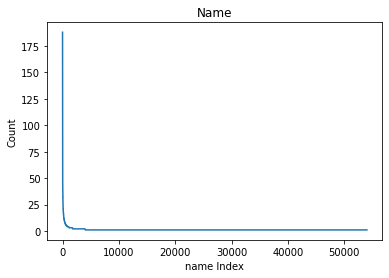

In [14]:
print("Total number of categories =",str(df.name_processed.value_counts().shape[0]))

# Printing top 20 frequent names 

x =PrettyTable()
x.add_column("Names",df.name_processed.value_counts().index[:20])
x.add_column("Count",df.name_processed.value_counts().values[:20])
x.add_column("Percent(%)",np.round(df.name_processed.value_counts().values[:20]/df.shape[0]*100,2))
print("Top 20")
print(x)

# Plotting the frequency of the names against the index of the different names

sns.lineplot(x=range(len(df.name_processed.value_counts().values)),y=df.name_processed.value_counts())
plt.title("Name")
plt.xlabel("name Index")
plt.ylabel("Count")
plt.show()

# 5. Brand_name

In [15]:
# Function to preprocess the "brand_name"

def brand_process(text):
    text = re.sub("[^A-Za-z0-9 ]","",text)
    text = text.lower() 
    return text

In [16]:
# Assigning the score correrponding to each "brand_name" equals to number of occurences for that brand

brand_score = dict(df[df.brand_name.notnull()]["brand_name"].apply(brand_process).value_counts())
processed_brand_name = []

for index,i in (df.iterrows()) :
    
    if  pd.isnull(i.brand_name): #if the brand name isnull
        
        words = i.name_processed.split() # we will split the name for that datapoint
        score  = []                      # stores the score for each word in words
        for j in words:  
            if j in brand_score.keys():  #if the words in name is present in the keys of brand score dict
                score.append(brand_score[j]) 
            else:                        #if the word is not a brand name
                score.append(-1)
        
        # the word with maximum score woulb be the brand name
        if max(score) > 0: 
            processed_brand_name.append(words[score.index(max(score))])
        else:                           # no brand name was found
            processed_brand_name.append("missing")
            
    else:                               # if the brand_name is not null
        processed_brand_name.append(brand_process(i.brand_name))


In [17]:
df["brand_name_processed"] = processed_brand_name

In [18]:
# applying the same for the test dataset

processed_brand_name_test = []
for index,i in (df_test.iterrows()) :
    
    if  pd.isnull(i.brand_name):
        
        words = i.name_processed.split()
        score  = []
        for j in words:
            if j in brand_score.keys():
                score.append(brand_score[j])
            else:
                score.append(-1)
        
        if max(score) > 0:
            processed_brand_name_test.append(words[score.index(max(score))])
        else:
            processed_brand_name_test.append("missing")
    else:
        processed_brand_name_test.append(brand_process(i.brand_name))

In [19]:
df_test["brand_name_processed"] = processed_brand_name_test

Total number of categories = 1084
Top 10
+------------------+-------+------------+
|   Brand Names    | Count | Percent(%) |
+------------------+-------+------------+
|     missing      | 15213 |   22.24    |
|     lularoe      |  8728 |   12.76    |
|       pink       |  5114 |    7.48    |
|       nike       |  3646 |    5.33    |
| victorias secret |  3360 |    4.91    |
|    forever 21    |  1729 |    2.53    |
|  american eagle  |  1645 |    2.4     |
|   michael kors   |  1163 |    1.7     |
|      coach       |  1138 |    1.66    |
|   kendra scott   |  898  |    1.31    |
+------------------+-------+------------+


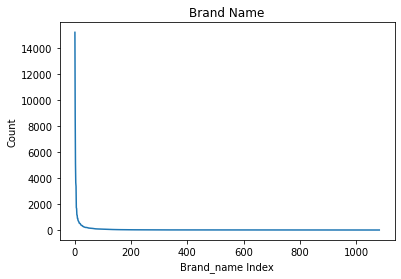

In [20]:
print("Total number of categories =",str(df.brand_name_processed.value_counts().shape[0]))

# prints the top 10 occuring brand names

x =PrettyTable()
x.add_column("Brand Names",df.brand_name_processed.value_counts().index[:10])
x.add_column("Count",df.brand_name_processed.value_counts().values[:10])
x.add_column("Percent(%)",np.round(df.brand_name_processed.value_counts().values[:10]/df.shape[0]*100,2))
print("Top 10")
print(x)

# Plotting the line plot of frequency against the index value brand names

sns.lineplot(x=range(len(df.brand_name_processed.value_counts().values)),y=df.brand_name_processed.value_counts().values)
plt.title("Brand Name")
plt.xlabel("Brand_name Index")
plt.ylabel("Count")
plt.show()

# 6. Seller_id

In [21]:
# Dropping the seller_id in both the datasets

df = df.drop("seller_id",1)
df_test = df_test.drop("seller_id",1)

# 7. Category_name

In [22]:
#Preprocessing the "category_name"

def category_name_preprocessing(text):
    text = re.sub("[^A-Za-z0-9/ ]","",text)
    text = re.sub("s "," ",text) 
    text = re.sub("s/","/",text)
    text = re.sub("  "," ",text)
    text = text.lower()
    return text

In [23]:
# replacing the null values in "category_name" with word "missing"

df.category_name[df.category_name.isnull()] = "missing"

df["category_name_preprocessed"] = df.category_name.apply(category_name_preprocessing)

In [24]:
df_test.category_name[df_test.category_name.isnull()] = "missing"

df_test["category_name_preprocessed"] = df_test.category_name.apply(category_name_preprocessing)

In [25]:
df.category_name.unique() #there are 3 tiers. Tier 1 is same in all datapoints. So neglecting that.

array(['Women/Shoes/Boots', 'Women/Shoes/Sandals', 'Women/Shoes/Athletic',
       'Women/Underwear/Bras', 'Women/Sweaters/Hooded',
       'Women/Jewelry/Earrings', 'Women/Jewelry/Bracelets',
       'Women/Jewelry/Necklaces', 'Women/Sweaters/Cardigan',
       'Women/Jeans/Slim, skinny', 'Women/Swimwear/Two-piece',
       'Women/Dresses/Knee-length', 'Women/Tops & blouses/Tunic',
       'Women/Tops & blouses/Blouse', 'Women/Shoes/Fashion sneakers',
       'Women/Athletic apparel/Shorts', 'Women/Tops & blouses/T-shirts',
       'Women/Dresses/Above knee, mini',
       'Women/Tops & blouses/Tank, cami',
       "Women/Women's accessories/Wallets",
       'Women/Athletic apparel/Shirts & tops',
       "Women/Women's handbags/Shoulder Bags",
       'Women/Athletic apparel/Pants, tights, leggings'], dtype=object)

In [26]:
# forming a column "Tier_2"

df["Tier_2"] = df.category_name_preprocessed.apply(lambda x:   x.split("/")[1] if len(x.split("/"))>1 else "missing")

df_test["Tier_2"] = df_test.category_name_preprocessed.apply(lambda x:   x.split("/")[1] if len(x.split("/"))>1 else "missing")

Total number of categories = 11
Top 10
+------------------+-------+---------------+
|      Tier_2      | Count | Percentage(%) |
+------------------+-------+---------------+
|    top blouse    | 16637 |     24.32     |
| athletic apparel | 14527 |     21.24     |
|       shoe       |  9866 |     14.42     |
|     jewelry      |  6240 |      9.12     |
|      dresse      |  5986 |      8.75     |
|     sweater      |  3194 |      4.67     |
|    underwear     |  2908 |      4.25     |
|  women handbag   |  2661 |      3.89     |
| women accessorie |  2309 |      3.38     |
|     swimwear     |  2176 |      3.18     |
+------------------+-------+---------------+


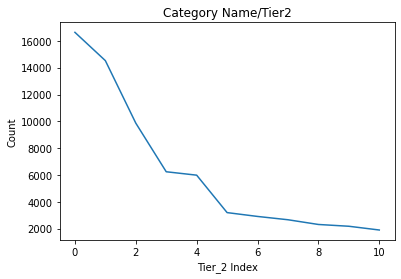

In [27]:
print("Total number of categories =",str(df.Tier_2.value_counts().shape[0]))

# prints the top 10 occuring tier_2 names

x =PrettyTable()
x.add_column("Tier_2",df.Tier_2.value_counts().index[:10])
x.add_column("Count",df.Tier_2.value_counts().values[:10])
x.add_column("Percentage(%)",np.round(df.Tier_2.value_counts().values[:10]/df.shape[0]*100,2))
print("Top 10")
print(x)

# plotting the line plot for frequency of categories in tier_2 and index of tier_2.

sns.lineplot(x=range(len(df.Tier_2.value_counts())),y=df.Tier_2.value_counts().values)
plt.title("Category Name/Tier2")
plt.xlabel("Tier_2 Index")
plt.ylabel("Count")
plt.show()

In [28]:
# forming a column "Tier_3"

df["Tier_3"] = df.category_name_preprocessed.apply(lambda x:   x.split("/")[2] if len(x.split("/"))>1 else "missing")

df_test["Tier_3"] = df_test.category_name_preprocessed.apply(lambda x:   x.split("/")[2] if len(x.split("/"))>1 else "missing")

Total number of categories = 23
Top 10
+---------------------+-------+---------------+
|        Tier_3       | Count | Percentage(%) |
+---------------------+-------+---------------+
| pant tight leggings |  9371 |      13.7     |
|       tshirts       |  8061 |     11.79     |
|        blouse       |  3616 |      5.29     |
|      tank cami      |  3483 |      5.09     |
|        boots        |  3243 |      4.74     |
|   above knee mini   |  3145 |      4.6      |
|        shorts       |  3064 |      4.48     |
|         bras        |  2908 |      4.25     |
|      kneelength     |  2841 |      4.15     |
|    shoulder bags    |  2661 |      3.89     |
+---------------------+-------+---------------+


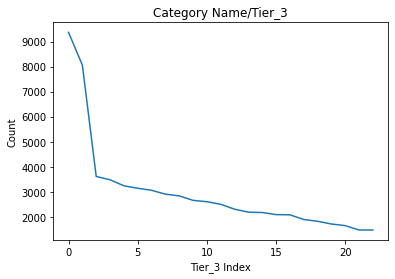

In [29]:
print("Total number of categories =",str(df.Tier_3.value_counts().shape[0]))

# prints the top 10 occuring tier_3 names

x =PrettyTable()
x.add_column("Tier_3",df.Tier_3.value_counts().index[:10])
x.add_column("Count",df.Tier_3.value_counts().values[:10])
x.add_column("Percentage(%)",np.round(df.Tier_3.value_counts().values[:10]/df.shape[0]*100,2))
print("Top 10")
print(x)

# plotting the line plot for frequency of categories in tier_3 and index of tier_3.

sns.lineplot(x =range(len(df.Tier_3.value_counts())),y=df.Tier_3.value_counts().values)
plt.title("Category Name/Tier_3")
plt.xlabel("Tier_3 Index")
plt.ylabel("Count")
plt.show()

# Item_description

In [30]:
#Preprocessing "item_description"

def processing_item_description(text):
    text = re.sub("\[rm\] ","",str(text))
    text = decontracted(text)
    text = re.sub("[^A-Za-z0-9 ]","",str(text))
    text = str(text).lower()
    text =  " ".join([i for i in text.split() if i not in st_words])
    if len(text)==0:
        text = "missing"
    return text

In [31]:
# replacing the null values with word "missing"

df.item_description[df.item_description.isnull()]="missing"

df["item_description_processed"] = df.item_description.apply(processing_item_description)

In [32]:
df_test.item_description[df_test.item_description.isnull()]="missing"

df_test["item_description_processed"] = df_test.item_description.apply(processing_item_description)

In [33]:
print("Total number of categories =",str(df.item_description_processed.value_counts().shape[0]))

# Printing top 20 frequent item_description

x =PrettyTable()
x.add_column("item_description",df.item_description_processed.value_counts().index[:10])
x.add_column("Count",df.item_description_processed.value_counts().values[:10])
x.add_column("Percentage(%)",np.round(df.item_description_processed.value_counts().values[:10]/df.shape[0]*100,2))
print("Top 10")
print(x) 

Total number of categories = 55460
Top 10
+------------------+-------+---------------+
| item_description | Count | Percentage(%) |
+------------------+-------+---------------+
|     missing      |  6859 |     10.03     |
|    never worn    |  263  |      0.38     |
|       new        |  255  |      0.37     |
|    brand new     |  234  |      0.34     |
| great condition  |  204  |      0.3      |
|  good condition  |  202  |      0.3      |
|       worn       |  201  |      0.29     |
|       nwt        |  162  |      0.24     |
|  brand new tags  |  132  |      0.19     |
|     new tags     |  125  |      0.18     |
+------------------+-------+---------------+


In [34]:
# Storing the train and the test files

df.to_csv("train_processed.csv")
df_test.to_csv("test_processed.csv")